In [54]:
import pandas as pd
import numpy as np
data = pd.read_csv('Stock_Data/RELIANCE.csv')

In [2]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [18]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5199,2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781.0,5148955.0,0.2461
5200,2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587.0,3213843.0,0.2251
5201,2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793.0,3040444.0,0.2019
5202,2020-11-26,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321309e+15,266412.0,3406506.0,0.2857
5203,2020-11-27,RELIANCE,EQ,1952.60,1940.50,1956.10,1921.40,1940.50,1929.80,1935.45,21845931,4.228164e+15,314085.0,12489338.0,0.5717


In [55]:
Price = data['VWAP']
date = data['Date']

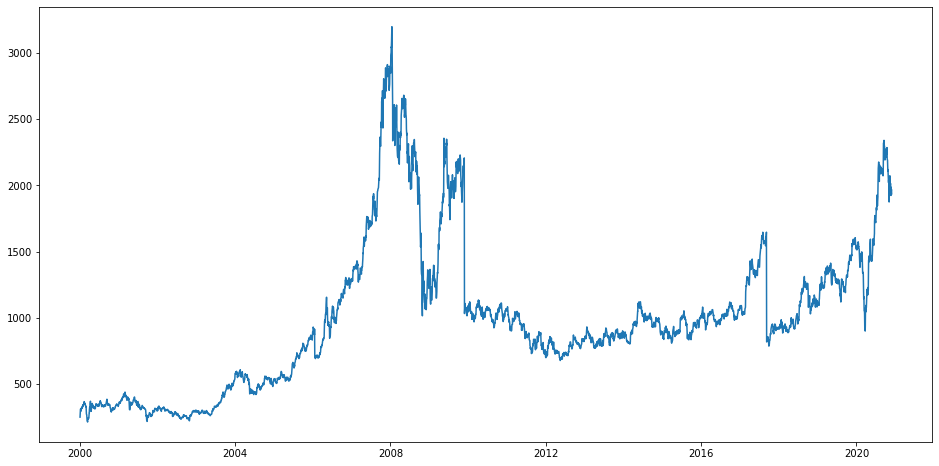

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

data['Date'] = pd.to_datetime(data['Date'],format='%Y/%m/%d')
data.index = data['Date']

plt.figure(figsize=(16,8))
plt.plot(data['VWAP'], label='Close Price history')

In [4]:
Price = Price.to_numpy()
print(Price.shape)

(5204,)


In [22]:
batch_size = 32
len_memory = 30
def get_batch(Price):
    
    X = np.zeros((Price.shape[0] - len_memory,len_memory))
    Y = np.zeros((Price.shape[0] - len_memory,1))
    for i in range(Price.shape[0] - len_memory):
        try:
            X_train = Price[i:i+len_memory]
            Y_train = Price[i+len_memory]
            X[i] = X_train
            Y[i] = Y_train
        except:
            print(X_train.shape)

    return X,Y

In [77]:
X,Y = get_batch(Price)

In [65]:
print(X[-1,:])
print(Y[-1])
X = np.reshape(X,(X.shape[0],X.shape[1],1))
print(X.shape)
print(Y.shape)

[2197.33 2189.75 2166.54 2143.87 2107.04 2118.9  2052.69 2026.38 2026.02
 2019.57 2040.66 1927.55 1873.92 1893.24 1949.03 2015.72 2051.91 2071.86
 2027.8  1987.14 2007.38 2005.96 2013.16 1979.95 1987.24 1923.27 1952.18
 1952.11 1969.06 1946.67]
[1935.45]
(5174, 30, 1)
(5174, 1)


In [78]:
max_price = np.max(X)
print(max_price)
X = X/max_price
Y = Y/max_price
print("X")
print(X)
print("Y")
print(Y)

3197.75
X
[[0.07798296 0.08240794 0.0859323  ... 0.1103651  0.11461184 0.11114377]
 [0.08240794 0.0859323  0.09239309 ... 0.11461184 0.11114377 0.10912986]
 [0.0859323  0.09239309 0.0966023  ... 0.11114377 0.10912986 0.10911109]
 ...
 [0.71449613 0.70081776 0.68714878 ... 0.60144477 0.6104855  0.61046361]
 [0.70081776 0.68714878 0.68477836 ... 0.6104855  0.61046361 0.61576421]
 [0.68714878 0.68477836 0.67752013 ... 0.61046361 0.61576421 0.60876241]]
Y
[[0.10912986]
 [0.10911109]
 [0.11058088]
 ...
 [0.61576421]
 [0.60876241]
 [0.60525369]]


In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, BatchNormalization, LSTM
from tensorflow.keras import Sequential
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X.shape[1], 1)))
model.add(LSTM(128, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [59]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 128)           66560     
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 25)                3225      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 201,395
Trainable params: 201,395
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(X, Y, epochs=10, batch_size=32, validation_split = 0.2)

Epoch 1/10
130/130 [==============================] - 19s 148ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 6.1037e-04 - val_mean_squared_error: 6.1037e-04
Epoch 2/10
130/130 [==============================] - 13s 99ms/step - loss: 4.4814e-04 - mean_squared_error: 4.4814e-04 - val_loss: 4.5242e-04 - val_mean_squared_error: 4.5242e-04
Epoch 3/10
130/130 [==============================] - 14s 108ms/step - loss: 3.6184e-04 - mean_squared_error: 3.6184e-04 - val_loss: 4.3444e-04 - val_mean_squared_error: 4.3444e-04
Epoch 4/10
130/130 [==============================] - 12s 93ms/step - loss: 3.3081e-04 - mean_squared_error: 3.3081e-04 - val_loss: 5.5551e-04 - val_mean_squared_error: 5.5551e-04
Epoch 5/10
130/130 [==============================] - 12s 94ms/step - loss: 3.1510e-04 - mean_squared_error: 3.1510e-04 - val_loss: 3.9154e-04 - val_mean_squared_error: 3.9154e-04
Epoch 6/10
130/130 [==============================] - 10s 76ms/step - loss: 3.0816e-04 - mean_squared_erro

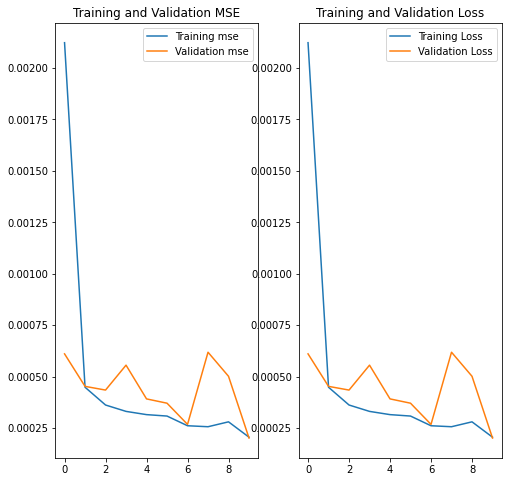

In [62]:
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mse, label='Training mse')
plt.plot(epochs_range, val_mse, label='Validation mse')
plt.legend(loc='upper right')
plt.title('Training and Validation MSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#lol
#mse is the loss itself

In [75]:
Y_pred = model.predict(X)

In [79]:
print(Y)
print(max_price)
print(Y_pred*max_price)

[[0.10912986]
 [0.10911109]
 [0.11058088]
 ...
 [0.61576421]
 [0.60876241]
 [0.60525369]]
3197.75
[[ 355.56015]
 [ 354.62704]
 [ 352.73584]
 ...
 [1947.5958 ]
 [1955.4225 ]
 [1955.063  ]]


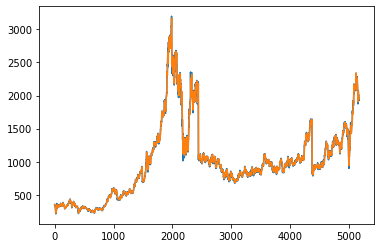

In [81]:
plt.plot(Y*max_price)
plt.plot(Y_pred*max_price)

In [83]:
error = np.linalg.norm((Y_pred - Y)*max_price)

In [84]:
print(error)

2907.244841925343


In [85]:
mean_error = error/Y.shape[0]
print(mean_error)

0.5618950216322657
